# Financial Analytics Project by Prachi Khartade

In [ ]:
#Problem Statement:
#The objective is to identify key metrics and factors that influence a company's market position, 
#as well as to uncover meaningful relationships between market capitalization and sales.

## Data cleaning process

In [126]:
import pandas as pd
import numpy as np

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:

import warnings
warnings.filterwarnings('ignore')

In [24]:
#uploadind dataset and reading it

data=pd.read_csv("Financial Analytics data.csv")
data

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN
...,...,...,...,...,...
483,496,Lak. Vilas Bank,3029.57,790.17,NaN
484,497,NOCIL,3026.26,249.27,NaN
485,498,Orient Cement,3024.32,511.53,NaN
486,499,Natl.Fertilizer,3017.07,2840.75,NaN


In [25]:
data.shape

(488, 5)

In [5]:
#Dataset has 488-->rows , 5-->columns

In [26]:
#All columns

columns=list(data)
columns

['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore', 'Unnamed: 4']

In [27]:
## Displays the first 10 rows

data.head(10)

,S.No.,Name,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
0,1,Reliance Inds.,583436.72,99810.00,NaN
1,2,TCS,563709.84,30904.00,NaN
2,3,HDFC Bank,482953.59,20581.27,NaN
3,4,ITC,320985.27,9772.02,NaN
4,5,H D F C,289497.37,16840.51,NaN
5,6,Hind. Unilever,288265.26,8590.00,NaN
6,7,Maruti Suzuki,263493.81,19283.20,NaN
7,8,Infosys,248320.35,17794.00,NaN
8,9,O N G C,239981.50,22995.88,NaN
9,10,St Bk of India,232763.33,57014.08,NaN


In [28]:
#summary of data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
 4   Unnamed: 4         94 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB


In [29]:
#calculating basic statistics

data.describe()

,S.No.,Mar Cap - Crore,Sales Qtr - Crore,Unnamed: 4
count,488.000000,479.000000,365.000000,94.000000
mean,251.508197,28043.857119,4395.976849,1523.870106
std,145.884078,59464.615831,11092.206185,1800.008836
min,1.000000,3017.070000,47.240000,0.000000
25%,122.750000,4843.575000,593.740000,407.167500
50%,252.500000,9885.050000,1278.300000,702.325000
75%,378.250000,23549.900000,2840.750000,2234.815000
max,500.000000,583436.720000,110666.930000,7757.060000


In [30]:
#checking null values/missing values

data.isnull().sum()

S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
Unnamed: 4           394
dtype: int64

In [13]:

#conclusion from above methods-
#1. S.no ---> 488 non-null , 0 null/missing values
#2.Name------> 488 non-null, 0 null/missing values
#3.Mar cap-croce--->365 non-null, 9 null/missing values
#4.Unamed 4---->94 non-null, 394 null/missing values

#Need to deal with null vales in Mar cap-crore column.
#Unamed 4 column is irrelevant and needs to drop
#S.no is not neceesaary hence need to drop


In [31]:
#Dropping Unamed4 column as it is irrelevant and not necessary

data=data.drop(columns=['S.No.', 'Unnamed: 4'])

In [33]:
data

,Name,Mar Cap - Crore,Sales Qtr - Crore
0,Reliance Inds.,583436.72,99810.00
1,TCS,563709.84,30904.00
2,HDFC Bank,482953.59,20581.27
3,ITC,320985.27,9772.02
4,H D F C,289497.37,16840.51
...,...,...,...
483,Lak. Vilas Bank,3029.57,790.17
484,NOCIL,3026.26,249.27
485,Orient Cement,3024.32,511.53
486,Natl.Fertilizer,3017.07,2840.75


In [16]:
#Handling missing/null values

# Drop the unnecessary columns
#data_cleaned = data.drop(columns=['S.No.', 'Unnamed: 4'])

# Handle missing values: Drop rows with missing values in 'Mar Cap - Crore' and 'Sales Qtr - Crore'
#data_cleaned = data_cleaned.dropna()

# Display the cleaned data information
#data_cleaned_info = data_cleaned.info()
#data_cleaned_head = data_cleaned.head()

#data_cleaned_info, data_cleaned_head



In [34]:
#when to use---use drop statement when uh have more than 45% data as empty data or null values.
#Hence dropna() would be appropriate and we need to handle very little missing values and dropping them would not affect much

data=data.dropna()

In [35]:
data

,Name,Mar Cap - Crore,Sales Qtr - Crore
0,Reliance Inds.,583436.72,99810.00
1,TCS,563709.84,30904.00
2,HDFC Bank,482953.59,20581.27
3,ITC,320985.27,9772.02
4,H D F C,289497.37,16840.51
...,...,...,...
482,Prime Focus,3031.50,609.61
483,Lak. Vilas Bank,3029.57,790.17
484,NOCIL,3026.26,249.27
485,Orient Cement,3024.32,511.53


In [38]:
#display clean data information

data_info=data.info()
data_head=data.head(10)

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 486
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               365 non-null    object 
 1   Mar Cap - Crore    365 non-null    float64
 2   Sales Qtr - Crore  365 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.4+ KB


In [39]:
data_info,data_head

(None,
              Name  Mar Cap - Crore  Sales Qtr - Crore
 0  Reliance Inds.        583436.72           99810.00
 1             TCS        563709.84           30904.00
 2       HDFC Bank        482953.59           20581.27
 3             ITC        320985.27            9772.02
 4         H D F C        289497.37           16840.51
 5  Hind. Unilever        288265.26            8590.00
 6   Maruti Suzuki        263493.81           19283.20
 7         Infosys        248320.35           17794.00
 8         O N G C        239981.50           22995.88
 9  St Bk of India        232763.33           57014.08)

In [40]:
#checking null values/missing values

data.isnull().sum()

Name                 0
Mar Cap - Crore      0
Sales Qtr - Crore    0
dtype: int64

In [97]:
# Check for duplicate entries
duplicate_entries = data.duplicated().sum()

duplicate_entries

0

In [98]:
data

,Name,Mar Cap - Crore,Sales Qtr - Crore,Mar Cap to Sales Ratio,Cap Category
0,Reliance Inds.,583436.72,99810.00,5.845474,Large Cap
1,TCS,563709.84,30904.00,18.240676,Large Cap
2,HDFC Bank,482953.59,20581.27,23.465685,Large Cap
3,ITC,320985.27,9772.02,32.847382,Large Cap
4,H D F C,289497.37,16840.51,17.190535,Large Cap
...,...,...,...,...,...
482,Prime Focus,3031.50,609.61,4.972851,Small Cap
483,Lak. Vilas Bank,3029.57,790.17,3.834074,Small Cap
484,NOCIL,3026.26,249.27,12.140490,Small Cap
485,Orient Cement,3024.32,511.53,5.912302,Small Cap


### Data is cleaned and now we will proceed with further process

In [ ]:
#converting clean data file into csv .

In [44]:
data.to_csv('cleaned_data.csv',index=False)

In [47]:
data_info1 = data.info()
data_head1 = data.head()

data_info1, data_head1

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 486
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               365 non-null    object 
 1   Mar Cap - Crore    365 non-null    float64
 2   Sales Qtr - Crore  365 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.4+ KB


(None,
              Name  Mar Cap - Crore  Sales Qtr - Crore
 0  Reliance Inds.        583436.72           99810.00
 1             TCS        563709.84           30904.00
 2       HDFC Bank        482953.59           20581.27
 3             ITC        320985.27            9772.02
 4         H D F C        289497.37           16840.51)

### Outliers

In [66]:
#Let's analyze the outliers in both the "Mar Cap - Crore" and "Sales Qtr - Crore" columns to see if any of them require special attention or treatment.

#I'll identify the companies with the highest and lowest values to better understand the distribution. Then, I'll proceed with data transformation.

In [67]:
# Identify companies with the highest and lowest market cap and sales
highest_market_cap = data.nlargest(5, 'Mar Cap - Crore')
lowest_market_cap = data.nsmallest(5, 'Mar Cap - Crore')

highest_sales = data.nlargest(5, 'Sales Qtr - Crore')
lowest_sales = data.nsmallest(5, 'Sales Qtr - Crore')

highest_market_cap, lowest_market_cap, highest_sales, lowest_sales


(             Name  Mar Cap - Crore  Sales Qtr - Crore
 0  Reliance Inds.        583436.72           99810.00
 1             TCS        563709.84           30904.00
 2       HDFC Bank        482953.59           20581.27
 3             ITC        320985.27            9772.02
 4         H D F C        289497.37           16840.51,
                 Name  Mar Cap - Crore  Sales Qtr - Crore
 486  Natl.Fertilizer          3017.07            2840.75
 485    Orient Cement          3024.32             511.53
 484            NOCIL          3026.26             249.27
 483  Lak. Vilas Bank          3029.57             790.17
 482      Prime Focus          3031.50             609.61,
               Name  Mar Cap - Crore  Sales Qtr - Crore
 14         I O C L        178017.48          110666.93
 0   Reliance Inds.        583436.72           99810.00
 23     Tata Motors        117071.87           74156.07
 27         B P C L         98278.00           60616.36
 54         H P C L         58034.78    

# Data transformation

In [105]:
#create market cap to sales ratio

#data['Mar Cap to Sales Ratio']=data['Mar Cap - Crore'] / data['Sales Qtr - Crore']

data.loc[:, 'Mar Cap to Sales Ratio'] = data['Mar Cap - Crore'] / data['Sales Qtr - Crore']


In [106]:
#summary statistics
summary_stats=data.describe

summary_stats

<bound method NDFrame.describe of                 Name  Mar Cap - Crore  Sales Qtr - Crore  \
0     Reliance Inds.        583436.72           99810.00   
1                TCS        563709.84           30904.00   
2          HDFC Bank        482953.59           20581.27   
3                ITC        320985.27            9772.02   
4            H D F C        289497.37           16840.51   
..               ...              ...                ...   
482      Prime Focus          3031.50             609.61   
483  Lak. Vilas Bank          3029.57             790.17   
484            NOCIL          3026.26             249.27   
485    Orient Cement          3024.32             511.53   
486  Natl.Fertilizer          3017.07            2840.75   

     Mar Cap to Sales Ratio Cap Category  
0                  5.845474    Large Cap  
1                 18.240676    Large Cap  
2                 23.465685    Large Cap  
3                 32.847382    Large Cap  
4                 17.190535   

In [124]:
#categorixe companies based on market cap

#defining thresholds for categorization
#taking vales of thresholds iamginnary
large_ct=50000
mid_ct=10000

def categorize_company(market_cap):
    if market_cap > large_ct:
        return 'Large Cap'
    elif market_cap > mid_ct:
        return 'Mid Cap'
    else :
        return 'Small Cap'


#this line applies the categorize_company function to each value in the 'Mar Cap - Crore' column of the data DataFrame 
#and creates a new column 'Cap Category' to store the results.
#data['Cap Category']=data['Mar Cap - Crore'].apply(categorize_company)
data.loc[:, 'Cap Category'] = data['Mar Cap - Crore'].apply(categorize_company)


data.head

<bound method NDFrame.head of                 Name  Mar Cap - Crore  Sales Qtr - Crore  \
0     Reliance Inds.        583436.72           99810.00   
1                TCS        563709.84           30904.00   
2          HDFC Bank        482953.59           20581.27   
3                ITC        320985.27            9772.02   
4            H D F C        289497.37           16840.51   
..               ...              ...                ...   
482      Prime Focus          3031.50             609.61   
483  Lak. Vilas Bank          3029.57             790.17   
484            NOCIL          3026.26             249.27   
485    Orient Cement          3024.32             511.53   
486  Natl.Fertilizer          3017.07            2840.75   

     Mar Cap to Sales Ratio Cap Category  
0                  5.845474    Large Cap  
1                 18.240676    Large Cap  
2                 23.465685    Large Cap  
3                 32.847382    Large Cap  
4                 17.190535    Lar

In [107]:
#Correlation matrix

# Select only numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Display the correlation matrix
correlation_matrix


,Mar Cap - Crore,Sales Qtr - Crore,Mar Cap to Sales Ratio
Mar Cap - Crore,1.000000,0.620702,0.097460
Sales Qtr - Crore,0.620702,1.000000,-0.190282
Mar Cap to Sales Ratio,0.097460,-0.190282,1.000000


## Data analysis and visualization

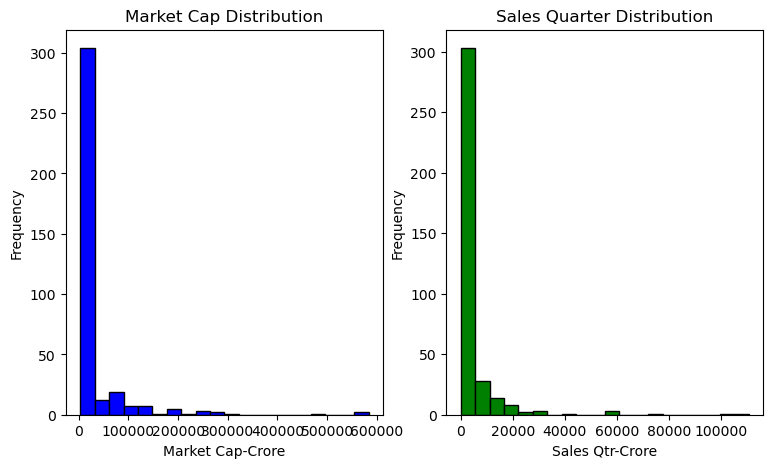

In [112]:
#Histogram of numeric columns
plt.figure(figsize=(9,5))

plt.subplot(1,2,1)


plt.hist(data['Mar Cap - Crore'],bins=20,color='blue',edgecolor='black')
plt.title('Market Cap Distribution')
plt.xlabel('Market Cap-Crore')
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(data['Sales Qtr - Crore'],bins=20,color='green',edgecolor='black')
plt.title('Sales Quarter Distribution')
plt.xlabel('Sales Qtr-Crore')
plt.ylabel('Frequency')

plt.tight_layout
plt.show()

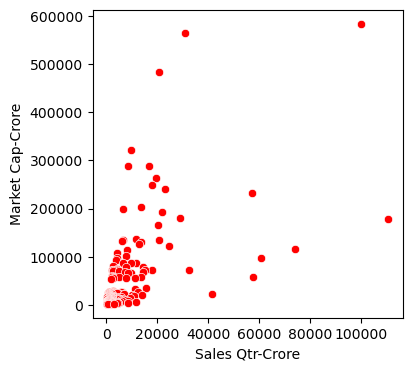

In [113]:
#Scatter plot to see the realationship between market cap and sales

plt.figure(figsize=(4,4))
sns.scatterplot(x='Sales Qtr - Crore',y='Mar Cap - Crore',data=data,color='red')
plt.xlabel('Sales Qtr-Crore')
plt.ylabel('Market Cap-Crore')
plt.show()

In [56]:
#Correlation matrix

# Select only numerical columns
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Display the correlation matrix
correlation_matrix


,Mar Cap - Crore,Sales Qtr - Crore
Mar Cap - Crore,1.000000,0.620702
Sales Qtr - Crore,0.620702,1.000000


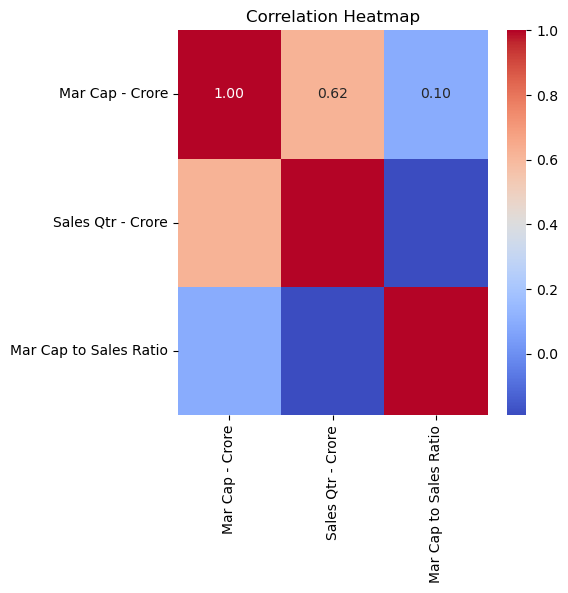

In [111]:
#Correlation heatmap

#Understanding the correlation between different financial metrics can reveal how they are related.

plt.figure(figsize=(5,5))
sns.heatmap(data[['Mar Cap - Crore' , 'Sales Qtr - Crore' , 'Mar Cap to Sales Ratio']].corr()
           , annot=True , cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

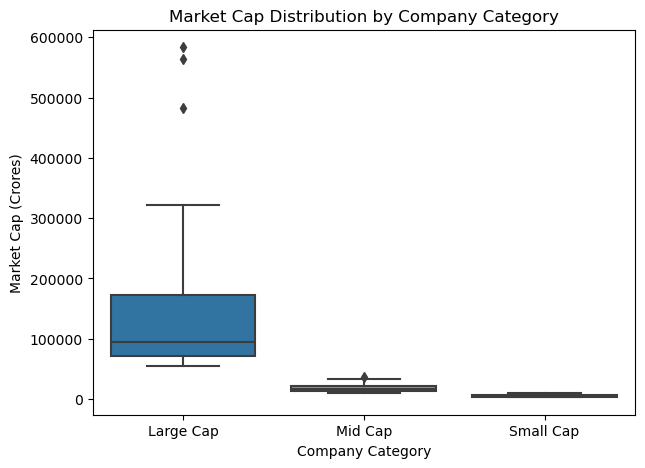

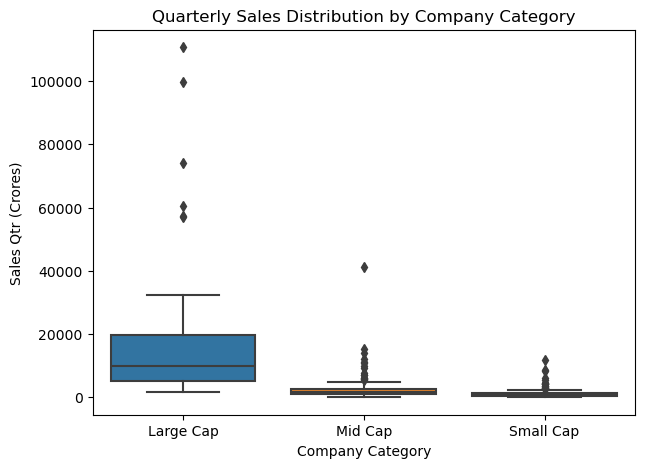

In [116]:
#Box plt: Market Cap and sales by Categpory

#A box plot is useful for visualizing the distribution and identifying outliers within categories.

plt.figure(figsize=(7, 5))
sns.boxplot(x='Cap Category', y='Mar Cap - Crore', data=data)
plt.title('Market Cap Distribution by Company Category')
plt.xlabel('Company Category')
plt.ylabel('Market Cap (Crores)')
plt.show()
print()
print()
plt.figure(figsize=(7, 5))
sns.boxplot(x='Cap Category', y='Sales Qtr - Crore', data=data)
plt.title('Quarterly Sales Distribution by Company Category')
plt.xlabel('Company Category')
plt.ylabel('Sales Qtr (Crores)')
plt.show()


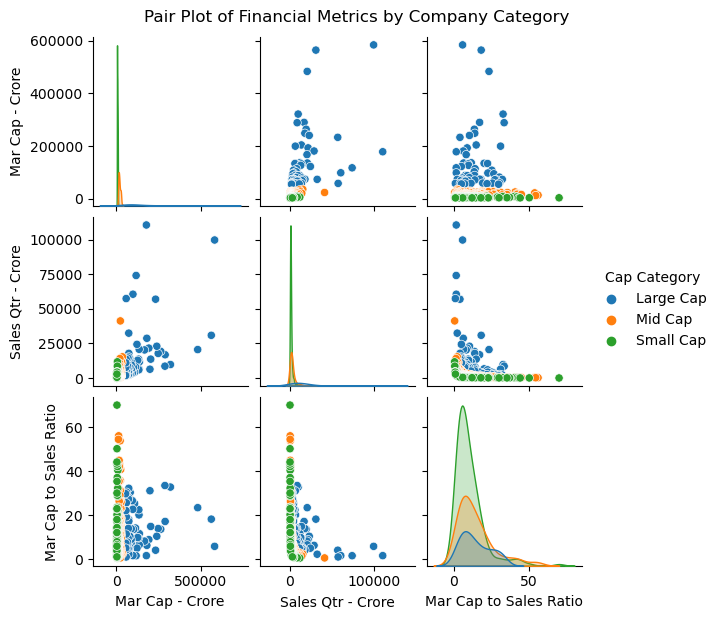

In [128]:
#Pair plot

#A pair plot allows you to see the relationships and distributions for multiple numerical variables in one view.

sns.pairplot(data, vars=['Mar Cap - Crore', 'Sales Qtr - Crore', 'Mar Cap to Sales Ratio'], hue='Cap Category',height=2)
plt.suptitle('Pair Plot of Financial Metrics by Company Category', y=1.02)
plt.show()


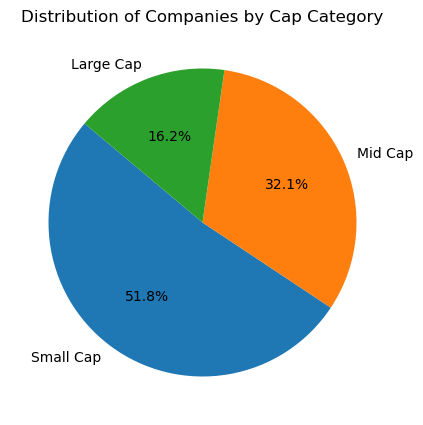

In [108]:
import matplotlib.pyplot as plt

# Count the number of companies in each category
category_counts = data['Cap Category'].value_counts()

# Plot a pie chart
plt.figure(figsize=(5, 5))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Companies by Cap Category')
plt.show()


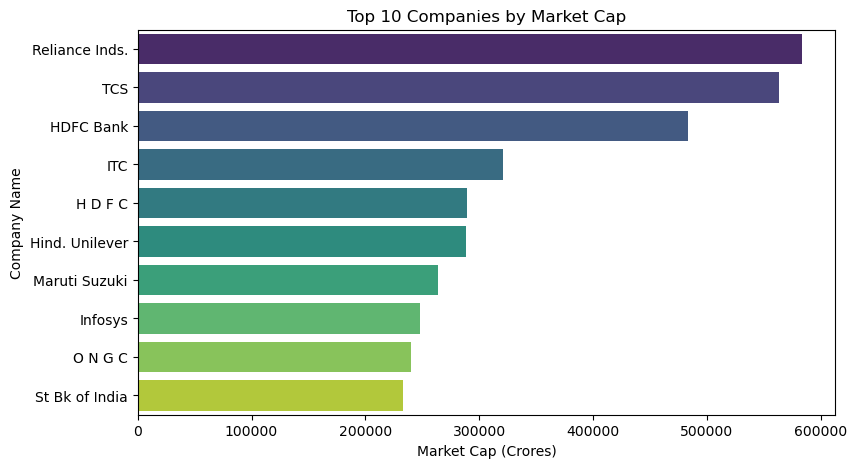

In [121]:
#Bar Plot: Top 10 Companies by Market Cap
#Identify the top 10 companies by market capitalization and visualize them.

top_10_market_cap = data.nlargest(10, 'Mar Cap - Crore')

plt.figure(figsize=(9, 5))
sns.barplot(x='Mar Cap - Crore', y='Name', data=top_10_market_cap, palette='viridis')
plt.title('Top 10 Companies by Market Cap')
plt.xlabel('Market Cap (Crores)')
plt.ylabel('Company Name')
plt.show()


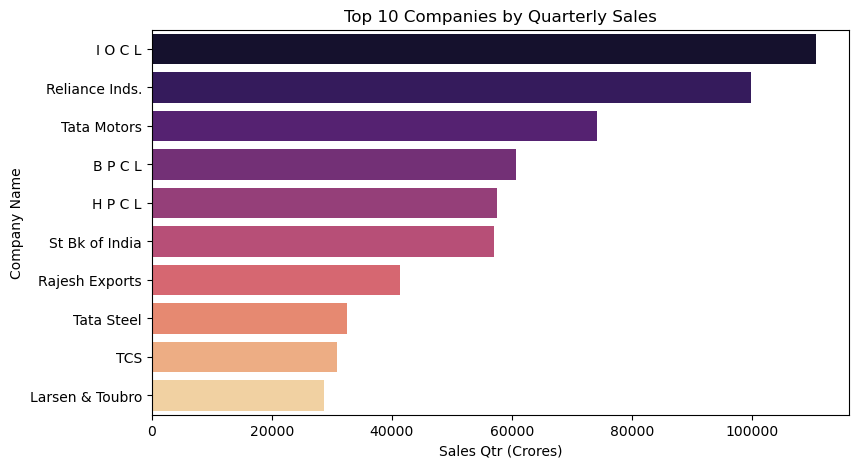

In [122]:
#Bar Plot: Top 10 Companies by Sales
#Similar to the market cap, you can analyze the top 10 companies by quarterly sales

top_10_sales = data.nlargest(10, 'Sales Qtr - Crore')

plt.figure(figsize=(9, 5))
sns.barplot(x='Sales Qtr - Crore', y='Name', data=top_10_sales, palette='magma')
plt.title('Top 10 Companies by Quarterly Sales')
plt.xlabel('Sales Qtr (Crores)')
plt.ylabel('Company Name')
plt.show()


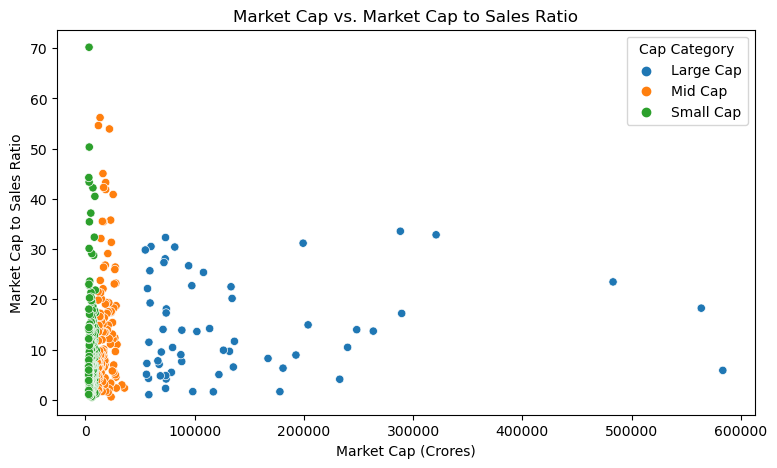

In [129]:
# Market Cap to Sales Ratio Analysis
#Visualize how different companies perform based on the Market Cap to Sales Ratio.

plt.figure(figsize=(9, 5))
sns.scatterplot(x='Mar Cap - Crore', y='Mar Cap to Sales Ratio', hue='Cap Category', data=data)
plt.title('Market Cap vs. Market Cap to Sales Ratio')
plt.xlabel('Market Cap (Crores)')
plt.ylabel('Market Cap to Sales Ratio')
plt.show()
